#                                                Avocado Project

# Problem statement:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers' cash registers based on actual retail sales of Hass avocados. 
Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 



# Dataset Discription:
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 
The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU's) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
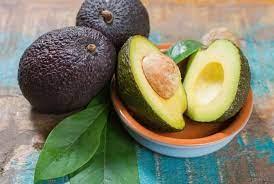

# Attribute Information

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number o
f avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression Do both tasks in the same .ipynb file and submit at single file.


# Reading and Understanding the Data


In [2]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
"""importing required libraries
Pandas is a useful library in data handling. 
Numpy library used for working with arrays. 
Seaborn/Matplotlib are used for data visualisation purpose. 
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation. 
"""
#importing required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

from subprocess import check_output


#from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Step 1 : Loading the Dataset

In [124]:
avocado_df = pd.read_excel('C:\\Users\\Atharv\\Downloads\\avocado 1 (1) (1).xlsx')

In [125]:
avocado_df.head(10)

,Index,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


# About the Columns:

Date -This column shows the date of the observation.

AveragePrice - This column shows the average price of a single avocado

type - This shows conventional or organic

year - This column shows the year

Region - this column shows the city or region of the observation

Total Volume - this colums shows Total number of avocados sold

4046 - this column shows Total number of avocados with PLU 4046 sold

4225 -this column shows Total number o f avocados with PLU 4225 sold

4770 -this coulmn shows Total number of avocados with PLU 4770 sold

Inspiration /Label The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression Do both tasks in the same .ipynb file and submit at single file.

# Describing Dataset

# Exploratory Data Analysis:

In [126]:
avocado_df.head(2)

,Index,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [127]:
#checking the total rows and total columns
avocado_df.shape

(18249, 14)

In [128]:
avocado_df.columns

Index(['Index', 'Date', 'AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region'],
      dtype='object')

In [129]:
avocado_df.dtypes

Index                    int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU_4046               float64
PLU_4225               float64
PLU_4770               float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

From above analysis we come to know that column Unnamed does not have any useful role for prediction in the price of avocado,so I am dropping that column Index.

In [130]:
df = avocado_df.drop(columns = "Index")

In [131]:
df

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [132]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU_4046               float64
PLU_4225               float64
PLU_4770               float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [133]:
#Checking null Values 
df.isnull().sum().sum()

0

<AxesSubplot:>

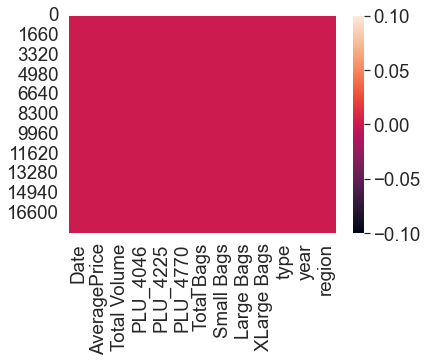

In [134]:
#Heatmap for checking null values
sns.heatmap(df.isnull())

observation- No null values in the data set.

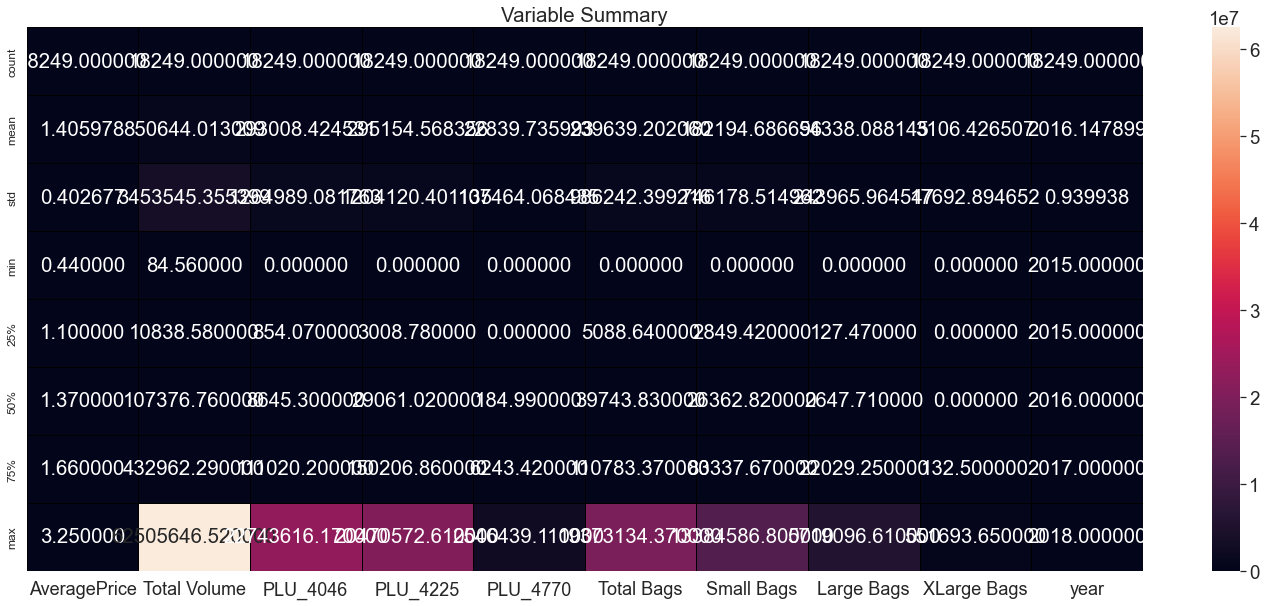

In [135]:
plt.figure(figsize=(25,10))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor="black",fmt='2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

In [136]:
#checking the mean of price at each year of organic type of avacado
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [137]:
#finding types of avacado sell from 2015 to 2018

In [138]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

Observation-In the year 2017 avacados are sold with higher price as compared to other year and 2015 is at second.

Also both type of avacado i.e. convential, organic both are present in same amount. 

In [139]:
df.describe()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observation- From above there is difference between mean and 50% value in some of the columns which used to get fix for better prediction.

above staticstic data show that their multiple outliers present in mostly XLargeBags.

STD and mean are very close to each other hence mean and 50%value of the column are same.

Most of the column statistics data are near to 0 values.

# Step 2 : Data Visualization

I plot different graph using different columns and try to visualize the data using matplotlib and seaborn library.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

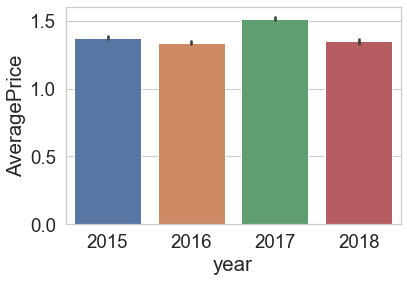

In [140]:
#Checking ratio of year and price that which year had max average price
sns.barplot(x='year',y='AveragePrice',data=df )

Observation- 2017 is the year when AveragePrice of avacado is maximum as compared to other years.

In [141]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region'],
      dtype='object')

In [142]:
date = df['Date']
date

0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

In [143]:
import datetime
df['Month'] = df['Date'].dt.month 

In [144]:
df

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

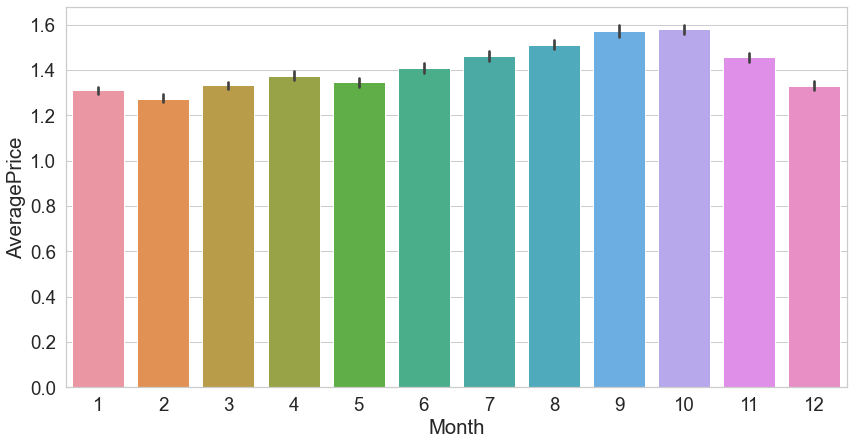

In [145]:
#checking the month and price that which year had max avarage price
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(x='Month',y='AveragePrice',data=df)

Observation -
In the month of 9-September and 10-October AveragePrice for avacado is maximum.

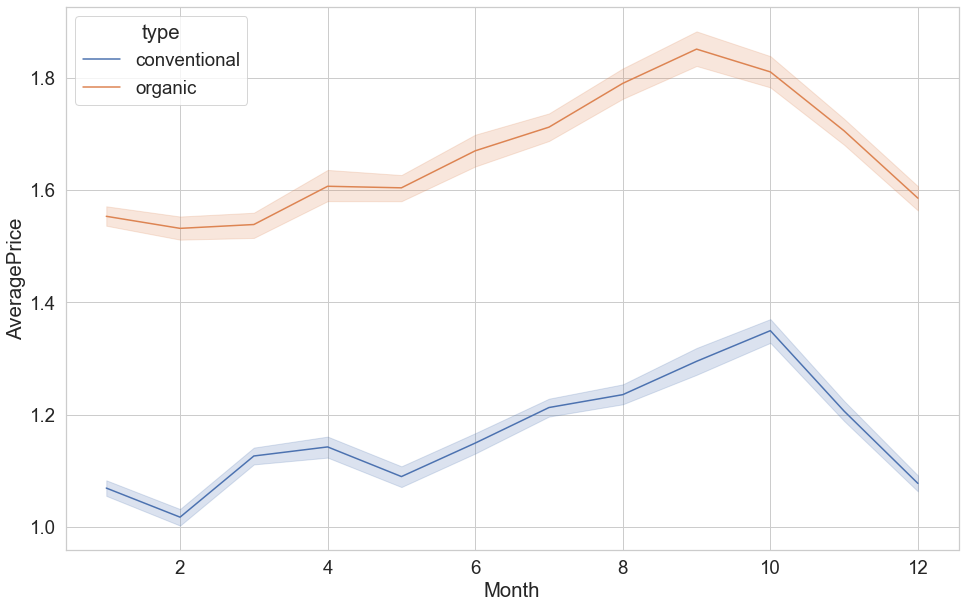

In [146]:
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df, x="Month", y="AveragePrice", hue="type")
plt.show()

Observation - Hike in Price of avocado between month 8-10 of both types of avocado organic and conventional type of avocado

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

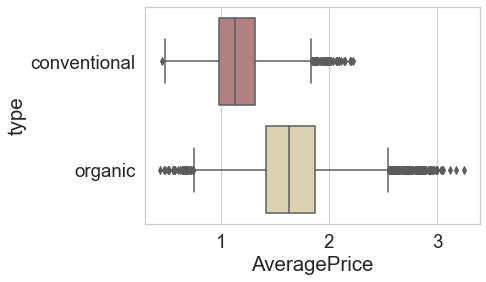

In [147]:
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'pink')

Observation - Organic fruits are more as compaired to conventional fruits.

In [148]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label = preprocessing.LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates())
dicts['type'] = list(label.classes_)
df.type = label.transform(df.type)



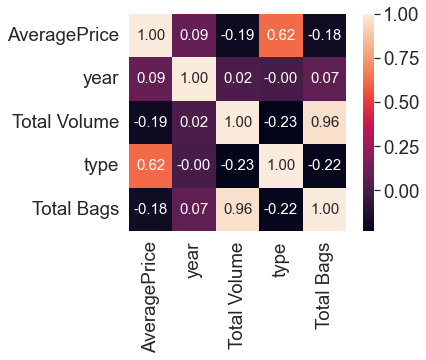

In [149]:
cols = ['AveragePrice', 'year','Total Volume','type','Total Bags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.7)

hm = sns.heatmap(cm,cbar =True,annot = True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels = cols,xticklabels = cols)

Observation- There is strong relation between Total volumn and Total Bagswhich is 0.96 and also between AveragePrice and type i.e 0.62
all other are weakly related with each other.

In [150]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region', 'Month'],
      dtype='object')

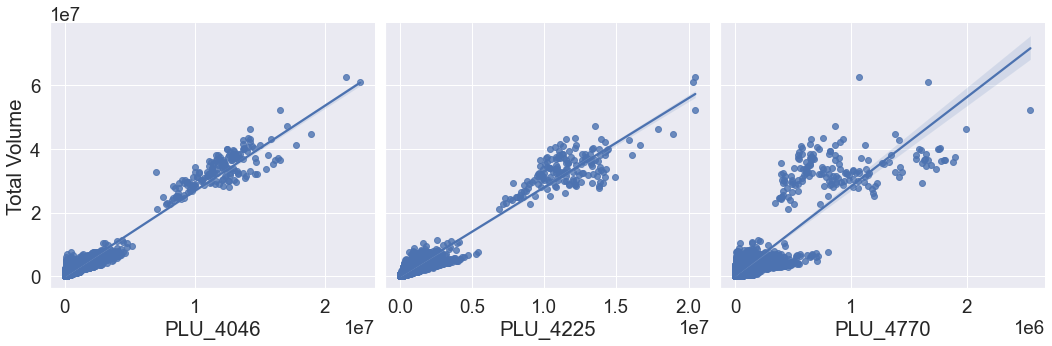

In [151]:
#Total Volume vs Small, Large and XLarge
sns.pairplot(df, x_vars=['PLU_4046', 'PLU_4225', 'PLU_4770'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

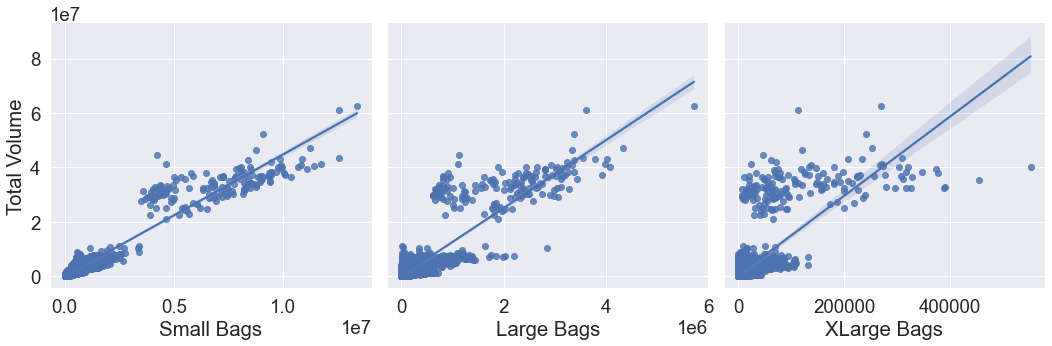

In [152]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

Observation- There is a strong co-relation between TotalVolume Vs PLU_4046 and TotalBags Vs SmallBags.
We can say weak co-relation between TotalVolume Vs PLU_4770 and TotalBags Vs XLargeBags.
PLU_4225 and LargeBags comes in the middle.

# Region Vs Year distribution

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

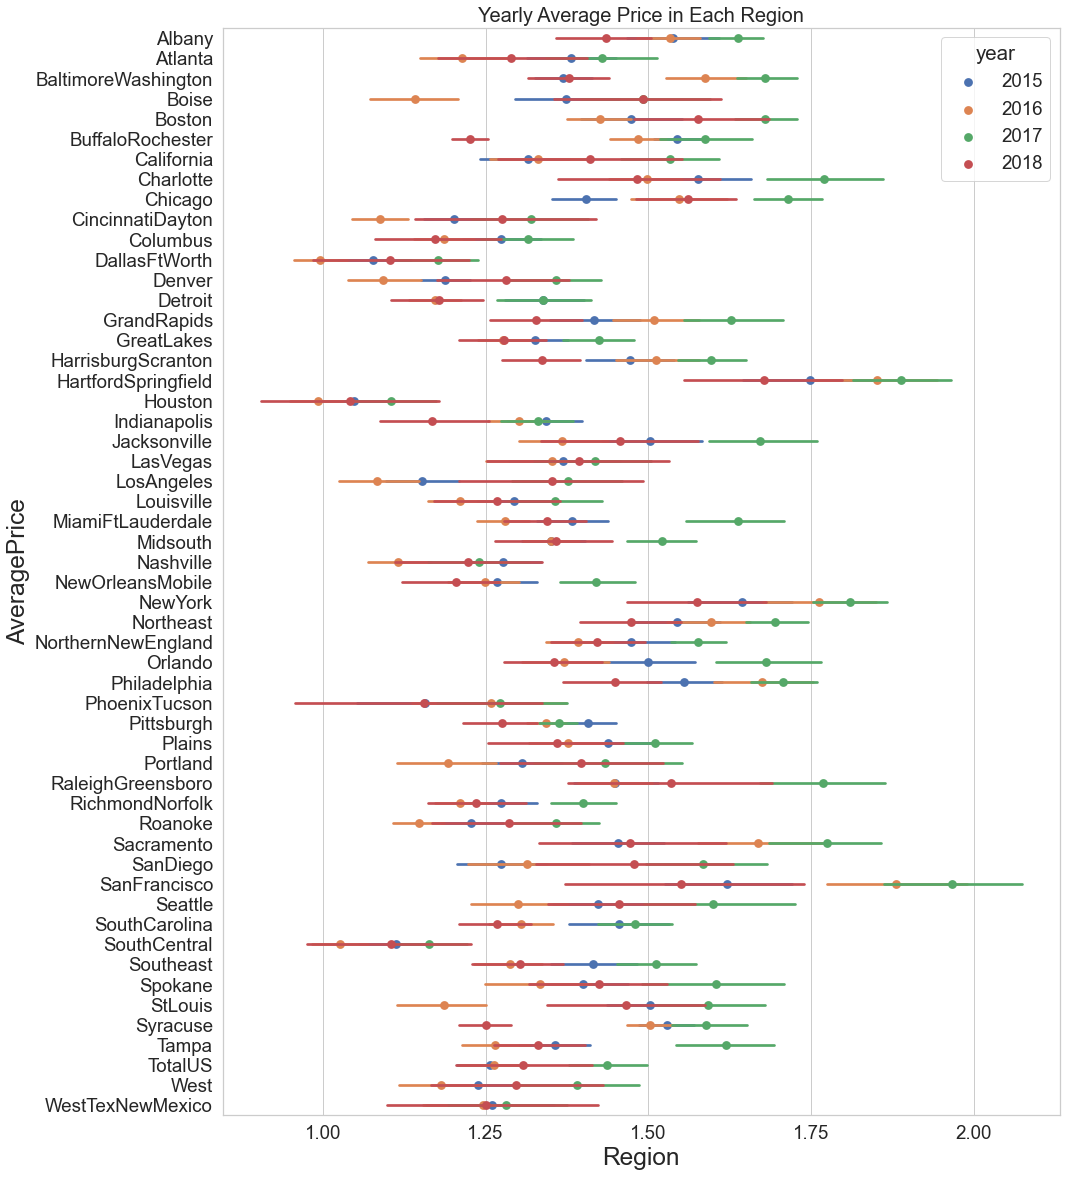

In [153]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

Observation- From the graph we can say that in year 2017 the HartfordSpringfield region being the maximum consumption of Avocado.

# Region Vs AveragePrice distribution

In [154]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region', 'Month'],
      dtype='object')

Text(0.5, 1.0, 'Type Average Price in Each Region')

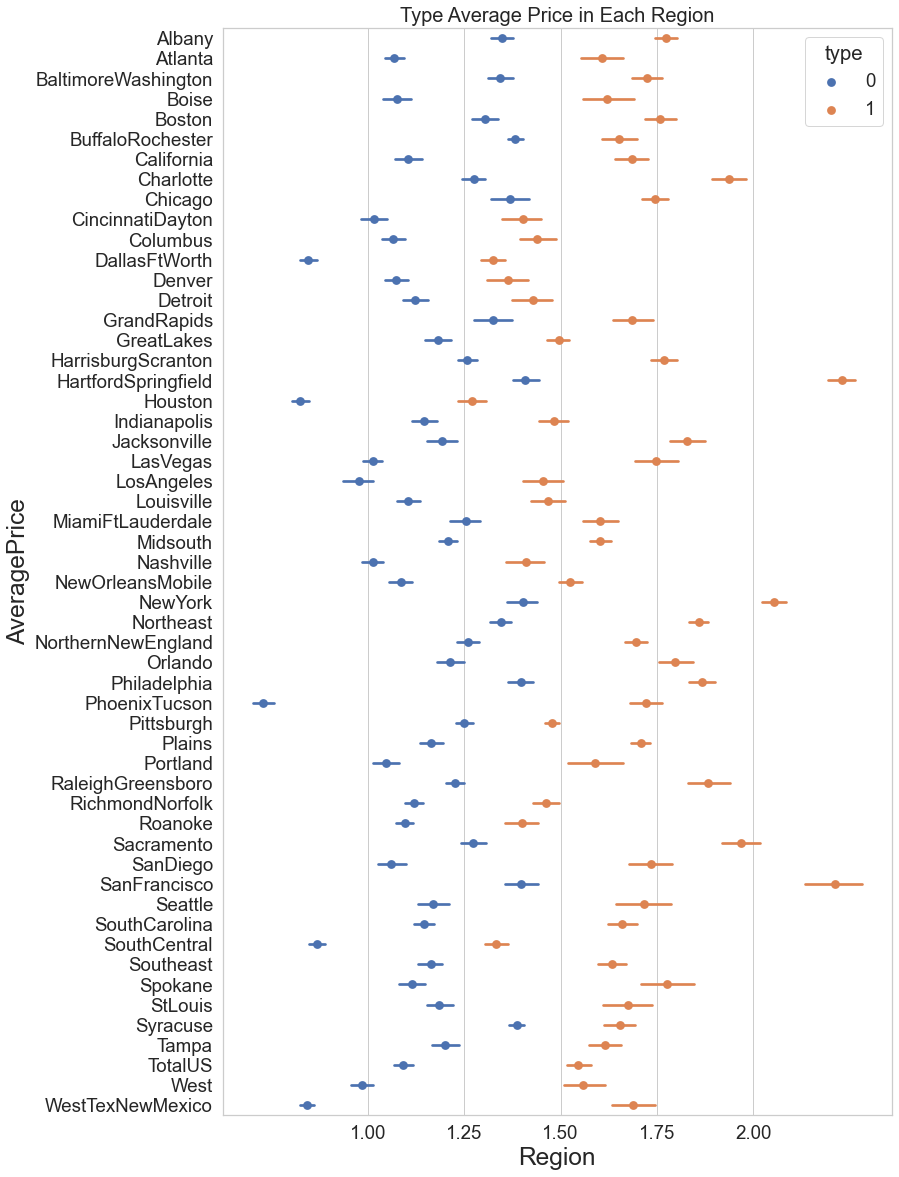

In [155]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'PLU_4046'}>],
       [<AxesSubplot:title={'center':'PLU_4225'}>,
        <AxesSubplot:title={'center':'PLU_4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

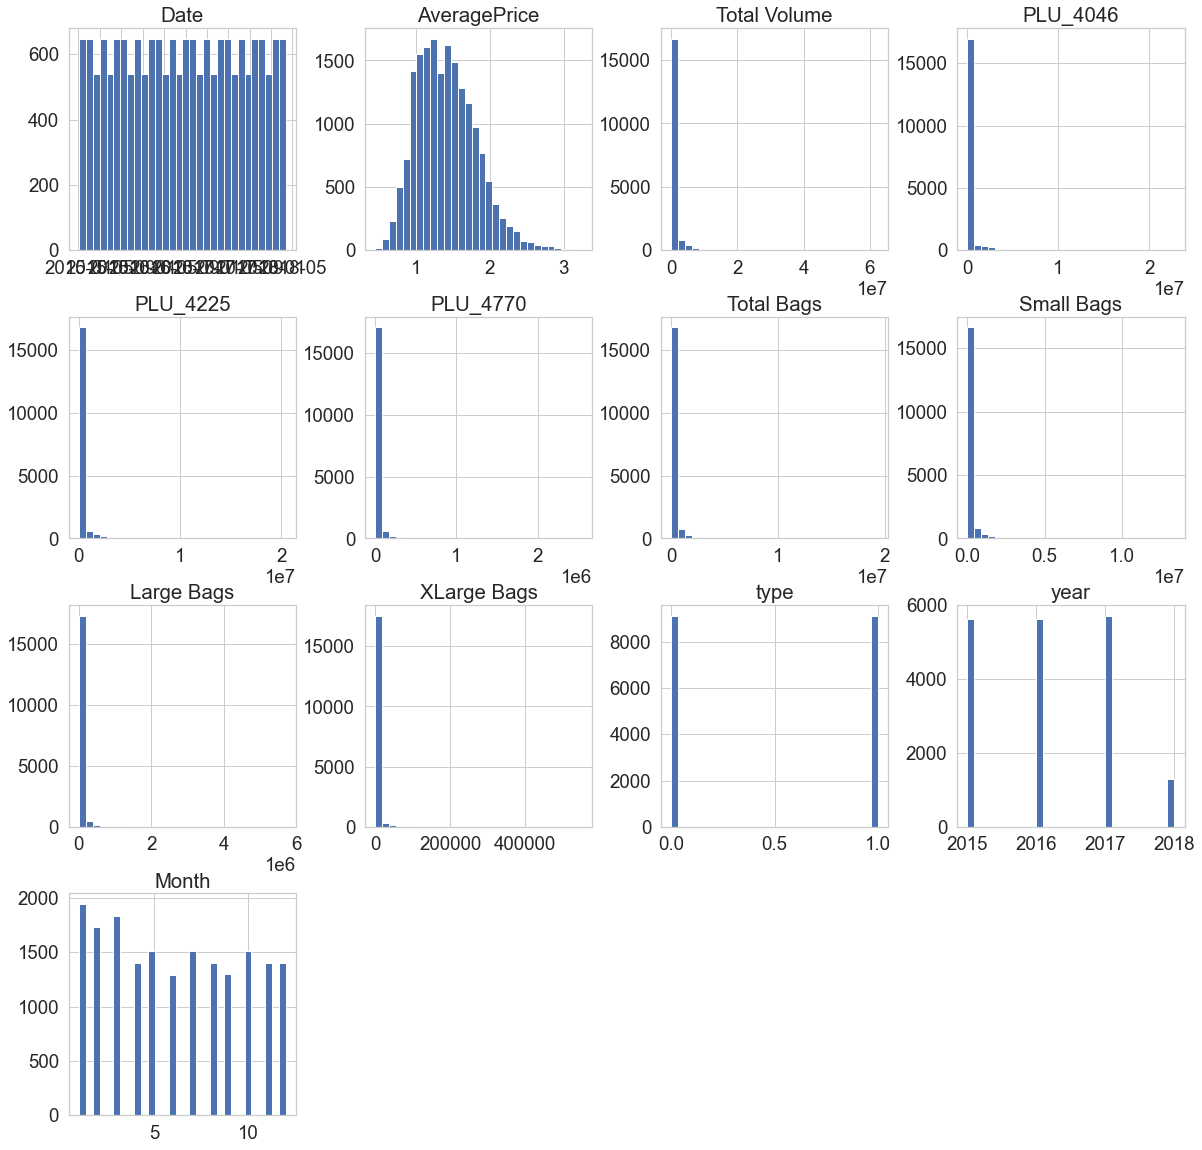

In [156]:
#Plotting histogram for univariate analysis and checking the Normal Distribution.
df.hist( grid=True, figsize=(20,20), layout=(4,4), bins=30)


Observation-
AveragePrice column is normally distributed over the histrogram.

All other parameters has very less change seen in their values so they are almost left-skewed data.

In [157]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
PLU_4046         8.648220
PLU_4225         8.942466
PLU_4770        10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
Month            0.106617
dtype: float64

# Step 3 : Model building using Logistic Regression
    

In [158]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region', 'Month'],
      dtype='object')

In [159]:
df.index

RangeIndex(start=0, stop=18249, step=1)

In [160]:
X=df[['AveragePrice', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Small Bags', 'Large Bags', 'XLarge Bags']] #feature columns
y=df.type #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 7)
Y Train Shape  (14599,)
X Test Shape  (3650, 7)
Y Test Shape  (3650,)


Accuracy score for Logistic Regression test data is: 0.9402739726027397
----------------------------------------------------------------------------------------
Confusion matrix for logistic regression model
              Predicted organic  Predicted Conventional
organic                    1664                     184
Conventional                 34                    1768
----------------------------------------------------------------------------------------


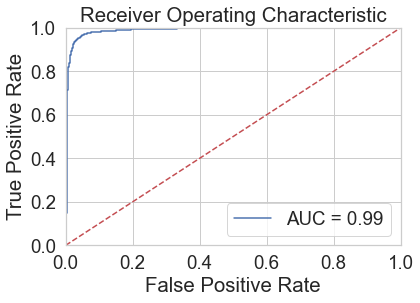

In [161]:
#Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)  

#Acuuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy score for test data using Random Forest : 0.996986301369863
----------------------------------------------------------------------------------------


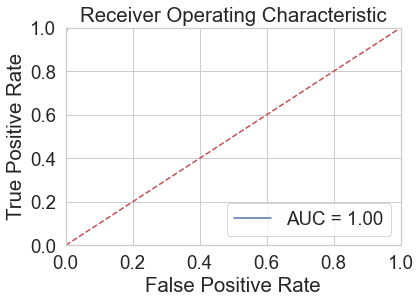

In [162]:
#Randomforest classifier
rfclass = RandomForestClassifier(random_state = 0)
rfclass.fit(X_train, y_train)

y_pred_train = rfclass.predict(X_train)
y_pred_test = rfclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')
#AUC ROC Curve
probs = rfclass.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Step 4 : Predicting Average Price of Avocado

In [163]:
df.drop(['Date', 'Total Volume', 'Total Bags', 'region', 'year','Month'], axis = 1,inplace = True)

In [165]:
df.columns

Index(['AveragePrice', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type'],
      dtype='object')

In [167]:
'''We are calculting Average price of Avocado considering columns:
['AveragePrice','PLU_4046', 'PLU_4225', 'PLU_4770', 'SmallBags', 'LargeBags', 'XLargeBags', 'type']'''

scaler = StandardScaler().fit(df)
df_avocado_scaler = scaler.transform(df)
df_avocado = pd.DataFrame(data_avocado_scaler)
df_avocado.columns = ['AveragePrice','PLU_4046', 'PLU_4225', 'PLU_4770', 'SmallBags', 'LargeBags', 'XLargeBags', 'type']
df_avocado.head()

,AveragePrice,PLU_4046,PLU_4225,PLU_4770,SmallBags,LargeBags,XLargeBags,type
0,-0.188689,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836
1,-0.139020,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836
2,-1.182069,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836
3,-0.809551,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836
4,-0.312861,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836


In [168]:
feature_cols = ['PLU_4046', 'PLU_4225', 'PLU_4770', 'SmallBags', 'LargeBags', 'XLargeBags', 'type']
X = df_avocado[feature_cols]

In [169]:
y = df_avocado.AveragePrice

In [170]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [171]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 7)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 7)
y_test shape:  (3650,)


In [172]:
#Using Linear Regression model
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [173]:
linreg = linear_reg(X,y)

In [174]:
linreg.score(X,y)

0.3980206520577072

In [175]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: -0.0025057119702502698
Coefficients: [-0.31332629  0.32039105 -0.12354322  0.06163263 -0.07300029  0.07633143
  0.60580356]


In [176]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [177]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.0025057119702502698
PLU_4046 -0.31332628809269136
PLU_4225 0.32039105174868393
PLU_4770 -0.12354321842178195
SmallBags 0.0616326276903639
LargeBags -0.07300028791378162
XLargeBags 0.07633142768206073
type 0.6058035608004646


Y = -0.002 - (PLU_4046 * 0.313) + (PLU_4225 * 0.320) - (PLU_4770 * 0.123) + (Small Bags * 0.061) - (Large Bags * 0.073) + (XLarge Bags * 0.076) + type * 0.605

From the above equation PLU_4770 and Large Bags are being negative. ie. If the value of PLU_4770 and Large Bags decreases, the Y value will increase and vise-versa.

In [178]:
y_pred_train = linreg.predict(X_train)

In [179]:
y_pred_test = linreg.predict(X_test)

Calculating Mean Absolute error, Mean Squared error, Root Mean Squared error

In [180]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 66290.05378563935
MAE for test set is 73109.35900146673
----------------------------------------------------------------------------------------
MSE for training set is 65072176048.6577
MSE for test set is 73767075654.73012
----------------------------------------------------------------------------------------
RMSE for training set is 255092.4852845683
RMSE for test set is 271600.9492890813


If we compare RMSE and MSE value, we can conclude that RMSE is greater than MSE.

# Step 5 :  Model Evaluation for Linear Regression Model
We are calculating Linear Regression model with same type of data.

In [182]:
print("Model Evaluation for Linear Regression Model")

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)


Model Evaluation for Linear Regression Model
----------------------------------------------------------------------------------------
r_squared for train data  -260290962328.05118  and adjusted_r_squared for train data -260415836341.9161
----------------------------------------------------------------------------------------
r_squared for train data  -260290962328.05118  and adjusted_r_squared for train data -260415836341.9161


Evaluation of Linear Regression Model using different columns

In [183]:
df.columns

Index(['AveragePrice', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type'],
      dtype='object')

In [184]:
feature_cols = ['PLU_4046', 'SmallBags', 'type']
X1 = df_avocado[feature_cols]  
y1 = df_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38662424075829566
RMSE for the test set is 0.6095675212451105


In [189]:
feature_cols = ['PLU_4225', 'LargeBags', 'type']
X1 = df_avocado[feature_cols]  
y1 = df_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38065568476473455
RMSE for the test set is 0.614996203316257


In [192]:
feature_cols = ['PLU_4770', 'XLargeBags', 'type']
X1 = df_avocado[feature_cols]  
y1 = df_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38102647934077394
RMSE for the test set is 0.6155209636844581


From the above analysis we can say that RMSE value 0.6095 is lower between the three. Lesser the RMSE value better would be the model.

# Using Random Forest Regressor

In [193]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test) 

Model Evaluation for Random Forest Regressor

In [194]:
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

print('----------------------------------------------------------------------------------------')
yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')
yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Random Forest Regressor 
RMSE for training set is 0.03273175678009187  and RMSE for test set is 0.07891195023829382
----------------------------------------------------------------------------------------
r_squared for train data  0.9957144912137506  and adjusted_r_squared for train data 0.9957124352503824
----------------------------------------------------------------------------------------
r_squared for test data  0.9750876596350375  and adjusted_r_squared for test data 0.9750397775969939


# Step 6: Conclusion-
Columns like type of avocado, size and bags have impact on Average Price, lesser the RMSE value accurate the model is, when we consider Small Hass in Small Bags.
Random forest Classifier has more accuracy than Logistic regression model for this dataset , accuracy is 0.99 it may also denote it is overfitting as it even classifies the outliers perfectly.
Random forest classifier model predicts the type of Avocado more accurately than Logistic regression model.
Random Forest Regressor model predicts the average price more accurately than linear regression model.